<img src='./images/GOES16.jpg' width=200 align='right' style='padding-left:30px'> <img src='./images/HRRR.png' width=288 align='right' style='padding-left:30px'>

**November 15, 2018**  
**ATMOS 5020: Environmental Programming**  
**John Horel & Brian Blaylock**

---

Download this notebook and all the data files from _GitHub_. The easiest way to do this is in the terminal. Change to the desktop directory `cd Desktop/` and then type:

    git clone https://github.com/johnhorel/ATMOS_5020_2018.git

> Windows Users: If you installed Python on your personal Windows PC and want to download the directory, you will need to install [Git for Windows](https://gitforwindows.org/). Otherwise, you can download the zip file from GitHub. Click `clone or download` and then `download zip`.

---

# 2-Dimensional Plots in `matplotlib`

The primary objective of this class is to introduce you to visualizing 2-dimensional datasets with `matplotlib`.

The best way to learn how to make matplotlib graphics (and programing in general) is to see how something is done, try do it yourself, read the documentation, and then make some change to do what you want. If you don't know how to do something, Google it. 99% of the time someone else had the exact same question.

You might hear the term **raster** a lot. Raster simply refers to an image that represents a 2D dataset. The two images above are rasters.

To start off, become familiar with a few basic methods for plotting 2D data. We will practice with a small 2D array of random data.

Reference: [numpy.random.random](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random.html)  

### Generate Random Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate some random 2D data (random numbers between 0 and 1).
rand = np.random.random([5,5])

print('Random array shape:', np.shape(rand))
print(rand)

Random array shape: (5, 5)
[[0.58062596 0.99909706 0.27098077 0.05595182 0.99963818]
 [0.56106047 0.35927473 0.10309149 0.26004157 0.62908962]
 [0.84808453 0.39332718 0.49702538 0.97044181 0.26646169]
 [0.43829926 0.0467867  0.9603219  0.42157042 0.99011894]
 [0.52982335 0.71983017 0.98820212 0.88038653 0.16175843]]


### Generate Rasters with `imshow` and `pcolormesh`

`plt.imshow()` and `plt.pcolormesh()` are two methods to create a raster image of 2D data. They assigns a color for every value in the 2D grid. The two are slightly different. `imshow()` can plot RGB arrays and `pcolormesh` can plot irregularly spaced grids. Don't worry too much about the differences for now.

The default color scale is [viridis](https://www.youtube.com/watch?time_continue=147&v=xAoljeRJ3lU), but this can be changed with the `cmap=` argument. 

Reference: [matplotlib color map names](https://matplotlib.org/examples/color/colormaps_reference.html)  
Note: to reverse the color map, add `_r` to the end the name. For example, to reverse `cmap='Blues'` you would do `cmap='Blues_r'`

Immediately after `plt.imshow`, you can add a colorbar with `plt.colorbar()`

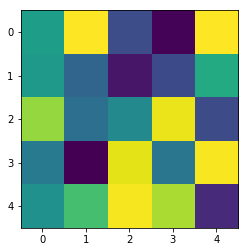

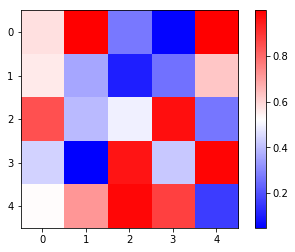

In [3]:
# Plot data with imshow
plt.figure(1)
plt.imshow(rand)

# Use a different color map and add a colorbar
plt.figure(2)
plt.imshow(rand, cmap='bwr')
plt.colorbar()

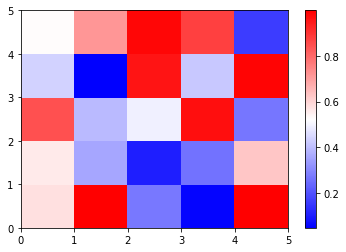

In [4]:
# Plot data with pcolormesh
plt.pcolormesh(rand, cmap='bwr')
plt.colorbar()

# notice how pcolormesh and imshow are upside-down from each other (look at the y axis)

### Generate Contour Plots and Filled Contours
Contours are lines of equal value, just like a topographic map. It doesn't look too pretty for a random dataset, but you'll see how useful it is later.

Contours can be lines `plt.contour()` or filled contours `plt.contourf()`. You can specify which levels to contour.

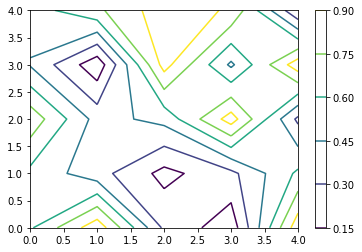

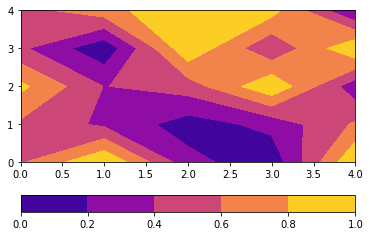

In [5]:
# Plot data with contours
plt.figure(1)
plt.contour(rand)
plt.colorbar()

# Color fill for specific levels and add a *horizontal* colorbar
plt.figure(2)
plt.contourf(rand, levels=np.arange(0,1.2,.2), cmap='plasma')
plt.colorbar(orientation='horizontal')

### Generate Wind Barbs
Wind barbs are one way to display vector data. In the case of wind, there is an east-west component (U) and north-south component (V). The number of flags corresponds to the wind's speed and points in the direction the wind is blowing.

(-1, 5)

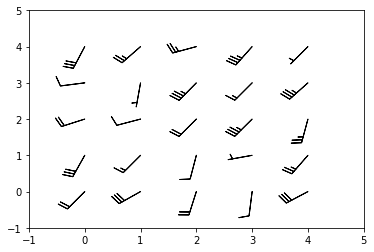

In [6]:
# Wind barbs (U and V compoents). V is transposed to 
plt.barbs(rand*25, np.transpose(rand*25))

plt.xlim([-1,5])
plt.ylim([-1,5])

---

# Visualizing Real Geospatial Data

For the remainder of class, we introduce you to some geospatial datasets used in atmospheric science and how to visualize those datasets in Python with `matplotlib`. The data we will look at is from 10 October 2018, during hurricane Michael.

### GOES-16 (GOES-East) Satellite
Geostationary satellites observe the weather from ~35,000 km (22,000 miles) away. The [GOES-R](https://www.goes-r.gov/) satellite series is arguably one of the most exciting weather-observing platforms ever made. GOES-16 was made operational last year and is also known as GOES-East. GOES-17 is expected to become operational in a few months and will be named GOES-West.
- Measures light in 16 different wavelengths between 0.47 &#181;m to 13.3 &#181;m (visible, near-infrared, infrared).
- ~2 km grid spacing
- Produces images of the contiguous United States every 5 minutes
- View data here: http://rammb-slider.cira.colostate.edu

### High-Resolution Rapid Refresh model (HRRR)
The [HRRR model](https://rapidrefresh.noaa.gov/hrrr/) is the highest resolution model run operationally in the United States.
- Produces many meteorological outputs including temperature, wind, humidity, pressure, simulated radar reflectivity, precipitation, etc.
- 3 km grid spacing
- Produces 18-hr forecasts every hour.
- View data here: https://rapidrefresh.noaa.gov/hrrr/HRRR/Welcome.cgi?dsKey=hrrr_ncep_jet

## Data provided to you
Look at the contents of the `data` directory.

Many meteorological datasets are stored in a format known as NetCDF or GRIB2. Since the Marriott Library computers do not have NetCDF or GRIB2 file readers installed, I saved the data as Numpy Binary files `.npy`. This way you don't have to worry about reading and loading data files and just focus on Matplotlib's plotting capabilities.


### How to load a `.npy` file. 
The data is saved in the `.npy` files are dictionaries. You can load the dictionary from the file as follows:

    a = np.load('PATH/NAME.ipy').item()
   
1. To look at the contents of the dictionary, print the variable it was saved to:
    - `print(a)`
1. To look at just the keys of the dictionary: 
    - `print(a.keys())`
1. To retrieve the values stored in a key:
    - `b = a['KEY NAME']`

---

---

# GOES-16 Satelite Data: Hurricane Michael

The GOES-16 Advanced Baseline Imager (ABI) is a passive sensor that measures 16 different wavelengths of light. Every 5 minutes, the satellite produces a new image of the contiguous United States for each of the 16 wavelengths. Each wavelength has a scientific purpose. You will learn more about atmospheric absorption at different wavelengths in the atmospheric radiation class.

Each wavelength is called a "channel" and each channel is stored as a different file. For example: `GOES_ABI_20181010-1438_C02.npy` is the GOES ABI dataset from 2018 Oct 10 at 14:32 UTC for Channel 2.

Look at the [ABI Reference Guide](https://www.goes-r.gov/education/ABI-bands-quick-info.html) for more information about what each channel observes and its purpose. 

![](./images/GOES-wavelengths.png)



In [7]:
# Load the data for Channel 2
channel_02 = np.load('./data/GOES_ABI_20181010-1438_C02.npy').item()

In [8]:
# What is the contents of the dictionary?
channel_02

{'wavelength': 0.64,
 'data': array([[       nan,        nan,        nan, ..., 0.48476145, 0.47174558,
         0.50507885],
        [       nan,        nan,        nan, ..., 0.44888845, 0.4088885 ,
         0.4469837 ],
        [       nan,        nan,        nan, ..., 0.45047575, 0.45523766,
         0.42507896],
        ...,
        [0.0380952 , 0.03555552, 0.03396822, ..., 0.03873012, 0.03904758,
         0.03619044],
        [0.0365079 , 0.03555552, 0.03301584, ..., 0.0412698 , 0.03428568,
         0.03396822],
        [0.04031742, 0.03999996, 0.03301584, ..., 0.03777774, 0.03587298,
         0.0333333 ]], dtype=float32),
 'units': '1',
 'long name': 'ABI Cloud and Moisture Imagery reflectance factor',
 'standard name': 'toa_lambertian_equivalent_albedo_multiplied_by_cosine_solar_zenith_angle',
 'DATE': '2018-10-10 14:38:38'}

In [9]:
# What are the dictionary keys?
channel_02.keys()

dict_keys(['wavelength', 'data', 'units', 'long name', 'standard name', 'DATE'])

In [10]:
# What is the value stored in 'long name'?
channel_02['long name']

'ABI Cloud and Moisture Imagery reflectance factor'

In [11]:
# What is the shape of the data array?
np.shape(channel_02['data'])

(1500, 2500)

### Plot the image with `imshow()`

We have loaded the file contents for **Channel 02**, which is the visible red light measureed at 0.64 &#181;m. Plot the data with the matplotlib function [`imshow`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html).

Text(1,1,'Wavelength: 0.64 um')

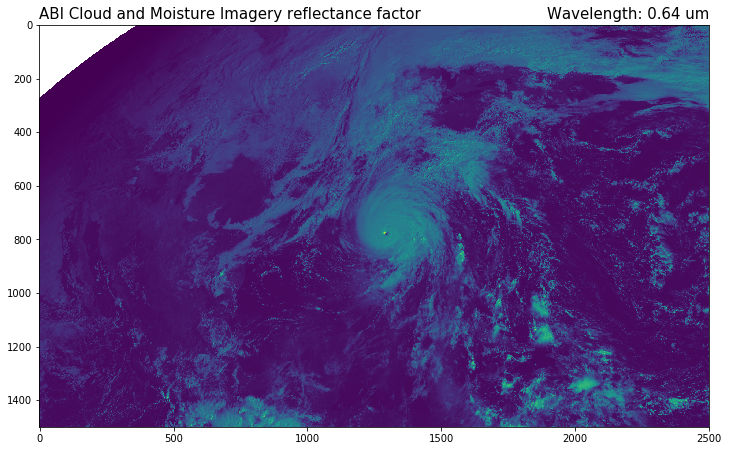

In [12]:
# Set the figure size
plt.figure(figsize=[12,10])

# Plot the channel's data as a raster image
plt.imshow(channel_02['data'])

# Modify the title
plt.title(channel_02['long name'], fontsize=15, loc='left')
plt.title("Wavelength: %s um" % channel_02['wavelength'], fontsize=15, loc='right')

You might not like the default colorscale. There are [others you can choose](https://matplotlib.org/examples/color/colormaps_reference.html) using the `cmap=` argument.

Often, single-channel satellite images are displayed in greyscale. This looks much better...

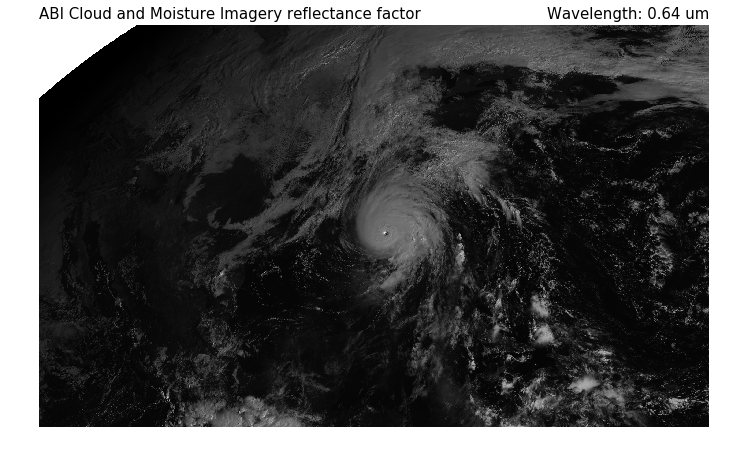

In [13]:
plt.figure(figsize=[12,10])

plt.imshow(channel_02['data'], cmap='gray')

plt.title(channel_02['long name'], fontsize=15, loc='left')
plt.title("Wavelength: %s um" % channel_02['wavelength'], fontsize=15, loc='right')

#Turn off the axis
plt.axis('off');

> **Question**  
> What is the white area in the top left corner?

# Color Images (RGB)
Color images on a screen are made of _Red_, _Green_, and _Blue_ light (RGB). If you don't believe me, check out this video: https://youtu.be/3BJU2drrtCM?t=446. Do you remember the [color picker](https://www.google.com/search?q=color+picker) used when customizing colors on your HTML page? 

Each RGB value is a number between 0 and 1 and controls the intensity of the Red, Green and Blue pixel on the screen. If `RGB=(0,0,1)` then you get a blue pixel. When RGB values are the same, e.g. `RGB=(0.5, 0.5, 0.5)`, then you get a shade of grey.

<img src="./images/rgb.png" width=150px, align='right'>

Since satelites measure different wavelengths of light, joining three different channels as an RGB will produce a color image. The trick is, knowing which channel to set as the R, G, and B values.

---

So far, we gave `imshow()` a 2D array to generate a plot. But if we give `imshow()` a 3D array (a "stacked" array with each RGB value) then `imshow()` will produce and RGB.

When the R, G, and B values are the same, you get shades of grey. If RGB are all assigned by **Channel 1** you get a grey image.

> ### Question: What combination of ABI channels will create a "true color" image?
> Channels 1 and 2 are visible channels. Channel 3 is a near infrared sensitive to vegetation. Experiment with different channel combinations to generate an RGB Image that resenmbles what you would expect to "see" from a satellite.
>
>    Instead of xx, insert 01, 02, or 03  
>    R = GOES_ABI_20181010-1437_C**XX**.npy  
>    G = GOES_ABI_20181010-1437_C**XX**.npy  
>    B = GOES_ABI_20181010-1437_C**XX**.npy

R: ABI Cloud and Moisture Imagery reflectance factor 0.47 um 	Units: 1
G: ABI Cloud and Moisture Imagery reflectance factor 0.47 um 	Units: 1
B: ABI Cloud and Moisture Imagery reflectance factor 0.47 um 	Units: 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


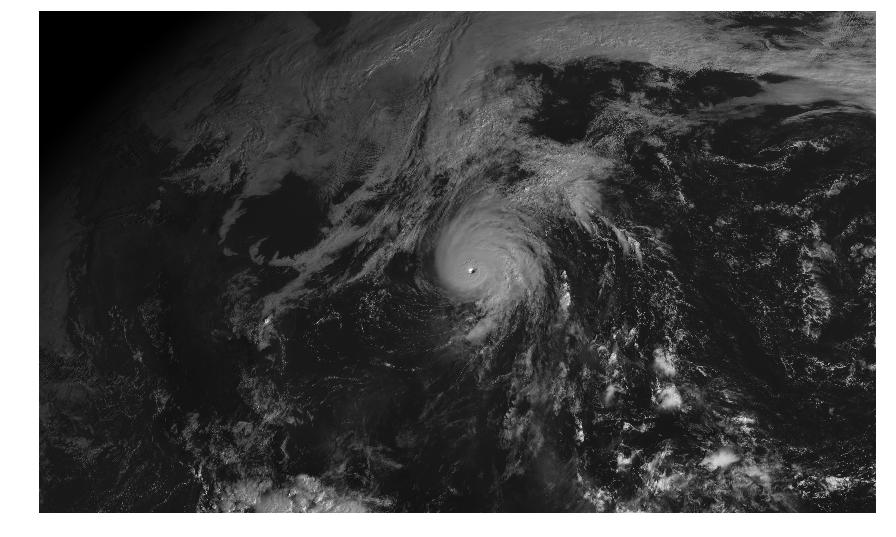

In [37]:
# Fix me! I am grey, but I want to be a True Color image. Use Channel's 1, 2, and 3
# Try to create a "True Color" RGB image


#==========================================================================
# Load different channels into the R, G, and B variables
R = np.load('./data/GOES_ABI_20181010-1438_C01.npy').item()
G = np.load('./data/GOES_ABI_20181010-1438_C01.npy').item()
B = np.load('./data/GOES_ABI_20181010-1438_C01.npy').item()
#==========================================================================

# print some information about the data
print('R:', R['long name'], R['wavelength'], 'um', '\tUnits:', R['units'])
print('G:', G['long name'], G['wavelength'], 'um', '\tUnits:', G['units'])
print('B:', B['long name'], B['wavelength'], 'um', '\tUnits:', B['units'])

# Create our 3D RGB array by stacking the arrays on top of each other in the right order
RGB = np.dstack([R['data'], G['data'], B['data']])

# Create the image
plt.figure(figsize=(15,10))
plt.imshow(RGB)
plt.axis('off');

### Gamma Correction

The above image looks really dark. 

If you are familiar with photo or video editing, you are familiar with the term _gamma correction_. Essentially, your eyes process light differently than a photo sensor. Most imaging software automatically applies an appropriate gamma correction when you take a picture. However, the GOES-16 satellite data is more "raw", so we have to apply the gamma correction ourselves. The standard gamma correction is scale the raw RGB values by the 0.4 power (or 1/2.2 power).

> corrected_image = raw_image<sup>0.4</sup>

Reference: [What is Gamma Correction?](https://www.cambridgeincolour.com/tutorials/gamma-correction.htm)

In [15]:
# Apply a gamma correction by scaling the RGB values by a power of 0.4
RGB = np.dstack([R['data'], G['data'], B['data']])**.4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5,1,'GOES-16 ABI True Color RGB')

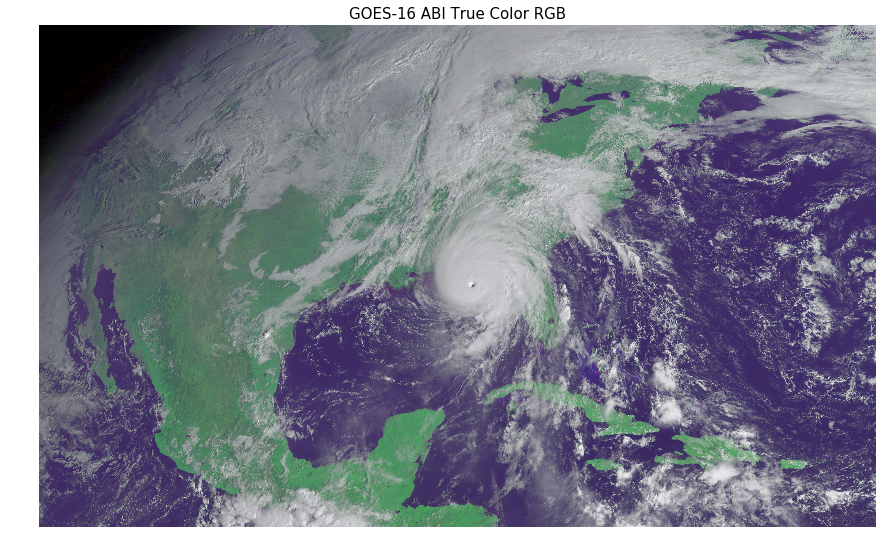

In [16]:
# Plot the RGB again
plt.figure(figsize=(15,10))
plt.imshow(RGB)
plt.axis('off')
plt.title('GOES-16 ABI True Color RGB', fontsize=15)

The green channel actually doesn't measure "Green" light, rather, it measures a wavelenth that is senstive to vegetation.

It is common to simulate the "true green" color with a simple interpolaiton. (See recipe: http://cimss.ssec.wisc.edu/goes/OCLOFactSheetPDFs/ABIQuickGuide_CIMSSRGB_v2.pdf)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


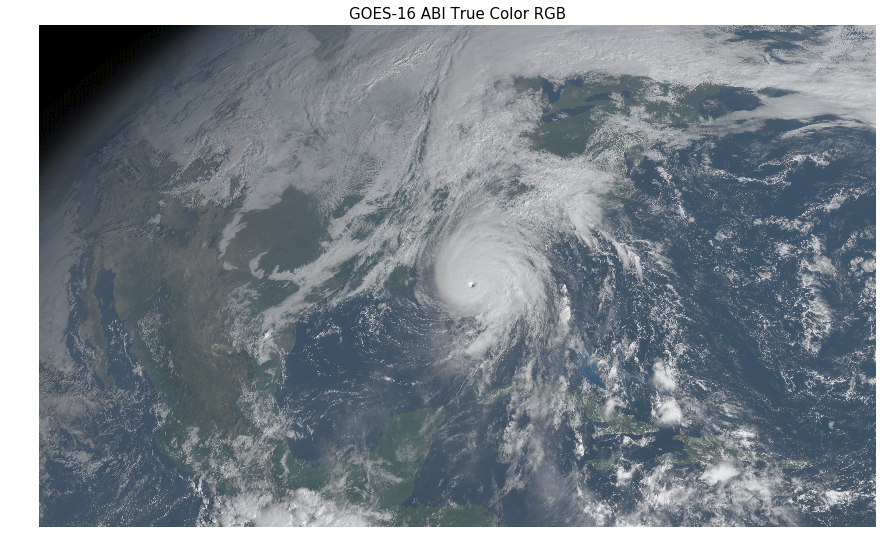

In [17]:
# create a modified Green
true_G = 0.45 * R['data'] + 0.45 * B['data'] + 0.1 * G['data']

RGB_veggie = np.dstack([R['data'], true_G, B['data']])**.4

plt.figure(figsize=(15,10))
plt.imshow(RGB_veggie)

plt.axis('off')
plt.title('GOES-16 ABI True Color RGB', fontsize=15);

# uncomment this line to save the image
# plt.savefig('GOES-True-Color')

# Plot All Channels
Useing subplots, we will plot all the GOES-16 channels in a single image. This method for plotting is slightly different than what we have used so far. We have to access each subplot axes object.

If you need to, refer back to the notes about `for loops`.

`enumerate()` is a handy function when you are using for loops. 

Reference: [enumerate()](https://docs.python.org/2/library/functions.html#enumerate)

Axes Shape: (4, 4)
Axes Shape: (16,)
opening channel 1 and plotting it on AxesSubplot(0.125,0.71587;0.168478x0.16413)
opening channel 2 and plotting it on AxesSubplot(0.327174,0.71587;0.168478x0.16413)
opening channel 3 and plotting it on AxesSubplot(0.529348,0.71587;0.168478x0.16413)
opening channel 4 and plotting it on AxesSubplot(0.731522,0.71587;0.168478x0.16413)
opening channel 5 and plotting it on AxesSubplot(0.125,0.518913;0.168478x0.16413)
opening channel 6 and plotting it on AxesSubplot(0.327174,0.518913;0.168478x0.16413)
opening channel 7 and plotting it on AxesSubplot(0.529348,0.518913;0.168478x0.16413)
opening channel 8 and plotting it on AxesSubplot(0.731522,0.518913;0.168478x0.16413)
opening channel 9 and plotting it on AxesSubplot(0.125,0.321957;0.168478x0.16413)
opening channel 10 and plotting it on AxesSubplot(0.327174,0.321957;0.168478x0.16413)
opening channel 11 and plotting it on AxesSubplot(0.529348,0.321957;0.168478x0.16413)
opening channel 12 and plotting it on A

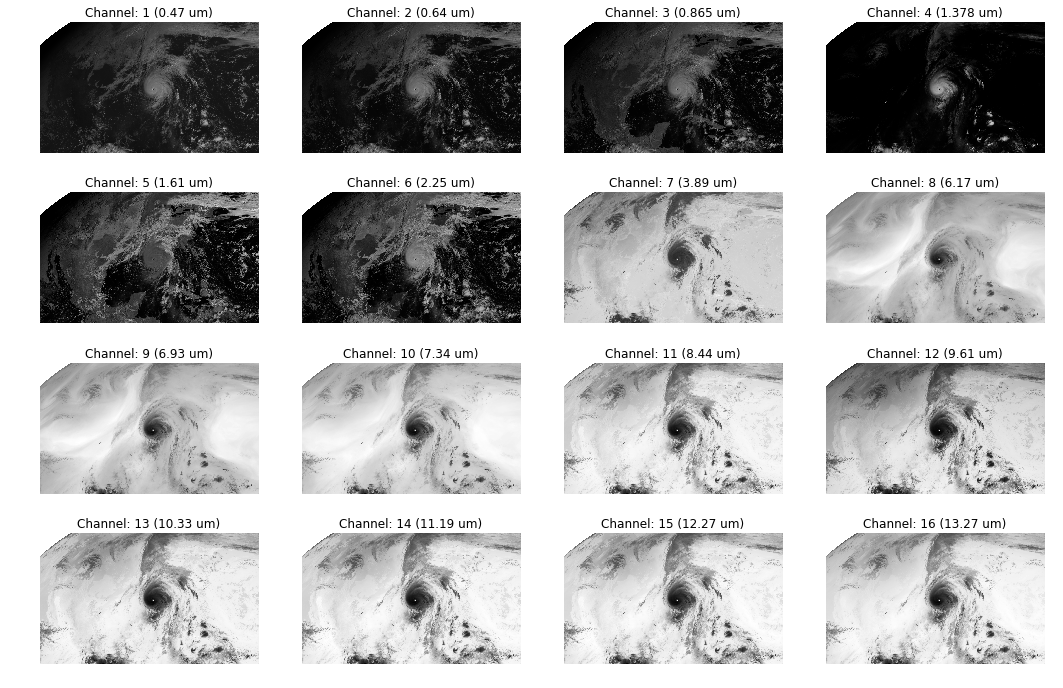

In [18]:
# Generate a figure with 4X4 subplots (16 total axes).
fig, axes = plt.subplots(4,4, figsize=(18,12))
print('Axes Shape:', np.shape(axes))

# Flatten the array of axes objects so we can iterate over each
axes = axes.flatten()
print('Axes Shape:', np.shape(axes))

# For each of the 16 axes, plot a different GOES-16 ABI channel.
for i, ax in enumerate(axes):
    # i is the iterator number, ax is an object in the axes array
    print('opening channel', i+1, 'and plotting it on', ax)
    
    # Open the channel data file
    channel = np.load('./data/GOES_ABI_20181010-1438_C%02d.npy' % (i+1)).item()
    
    # To plot on a specific axes, we need to tell python which area we want to work with.
    # plt.sca(axes_name) is used to 'set current axes'. Each loop iteration we will set a different axes to plot on
    plt.sca(ax)
    plt.imshow(channel['data'], cmap='gray')
    plt.title('Channel: %s (%s um)' % (i+1, channel['wavelength']))
    plt.axis('off')

In [19]:
# What is the axes object array?
print(axes)

# Plot data from HRRR model output
There are many ways to visualize weather model data. Here are a few ways

### Near Surface Temperature

In [20]:
# Load HRRR temperature dataset
TMP = np.load('./data/HRRR_F00_20181010-1400_TMP-2-m.npy').item()

In [21]:
# What keys are contained in the dictionary?
TMP.keys()

dict_keys(['value', 'lat', 'lon', 'valid', 'anlys', 'msg', 'name', 'units', 'level', 'URL'])

In [22]:
# What are the units of the temperature data?
TMP['units']

'K'

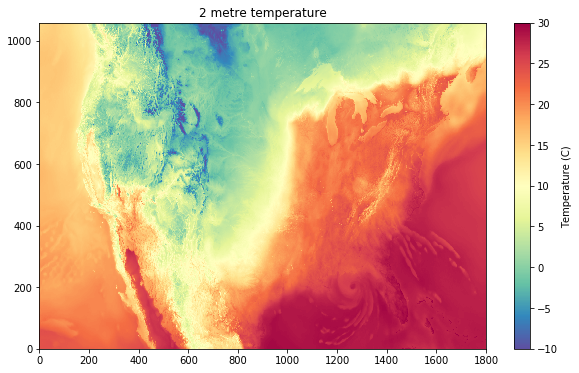

In [23]:
# Make a simple raster image of the temperature data. Remember to convert value from K to C.
plt.figure(figsize=[10,6])
plt.pcolormesh(TMP['value']-273.15, cmap='Spectral_r', vmax=30, vmin=-10)
plt.title(TMP['name'])

# add a colorbar and a colorbar label
cb = plt.colorbar()
cb.set_label('Temperature (C)')

Can you see the general outline of the United States?

### Simulated Radar Reflectivity

In [24]:
# Load the simulated reflectivity dataset
REFC = np.load('./data/HRRR_F00_20181010-1400_REFC-entire.npy').item()

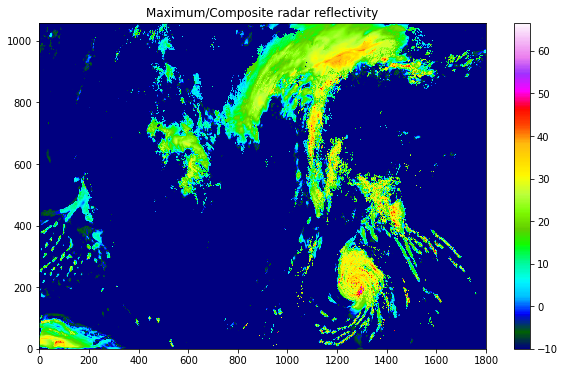

In [25]:
# Plot the simulated reflectivity with the 'gist_ncar' color map
plt.figure(figsize=[10,6])
plt.pcolormesh(REFC['value'], cmap='gist_ncar')
plt.title(REFC['name'])
plt.colorbar()

### Land and Water boundary with 500 hPa Geopotential Height
This shows that you can overlay different types of plots

In [26]:
# Load the Land-Water dataset. This is the location of land and water.
LAND = np.load('./data/HRRR_F00_20181010-1400_LAND-WATER.npy').item()

# Load the 500 hPa heights dataset
HGT500 = np.load('./data/HRRR_F00_20181010-1400_HGT-500-mb.npy').item()

Text(0,1,'500 hPa Geopotential Height')

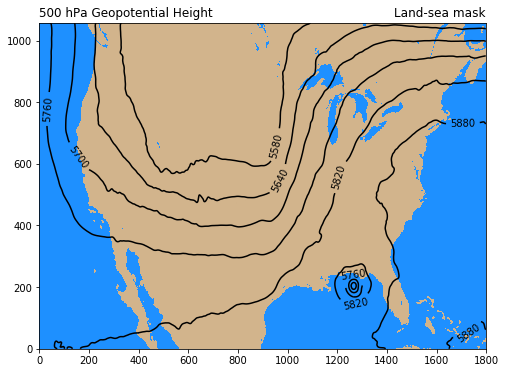

In [27]:
# Overlay the geopotential hieght on the Land-Water data.

plt.figure(figsize=[8,6])

# First plot the land/water boundaries
plt.contourf(LAND['value'], levels=[0,.5,1], colors=['dodgerblue','tan'])
plt.title(LAND['name'], loc='right')

# Then plot the height contours on top!
# By assining the conoutr object to `cs` we can add some lables to each contour label.
cs = plt.contour(HGT500['value'], colors='k', levels=range(5400,6000,60))
plt.clabel(cs, fmt='%0.0f')
plt.title('500 hPa ' + HGT500['name'], loc='left')

### Plot radar reflectivity over land/water map.
Remove low reflectivity values so the land and water show beneath.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


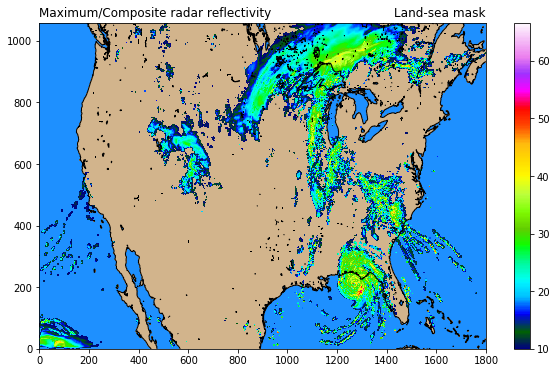

In [28]:
plt.figure(figsize=[10,6])

# Plot land-water background colors
plt.contourf(LAND['value'], levels=[0,.5,1], colors=['dodgerblue','tan'])
plt.title(LAND['name'], loc='right')

# Plot land-water edge boundary in black
plt.contour(LAND['value'], levels=[0], colors='k', linewidths=1)
plt.title(LAND['name'], loc='right')

# If we plot the reflectivity data like we did before, it will completely cover the land-water basemap.
# To let the map show through where there is no reflectiviy, we will reassign low reflectivity values to "not a number" or `np.nan.

# Make a copy of the REFC['value'] data
# Wherever the `new_REFC` array is less than 10, assign it a value of np.nan
new_REFC = REFC['value']
new_REFC[new_REFC < 10] = np.nan

# Plot the reflectivity values on top
plt.pcolormesh(new_REFC, cmap='gist_ncar')
plt.title(REFC['name'], loc='left')
plt.colorbar()

### Georeferenced Data Points
`pcolormesh()` and `contour()` and `contourf` style plots can be given arrays to specify the x, y, and z values.

    plt.pcolormesh(x, y, z)
    
    plt.pcolormesh(longitude, latitude, value)
    
> Note: You can not do this with `imshow()`

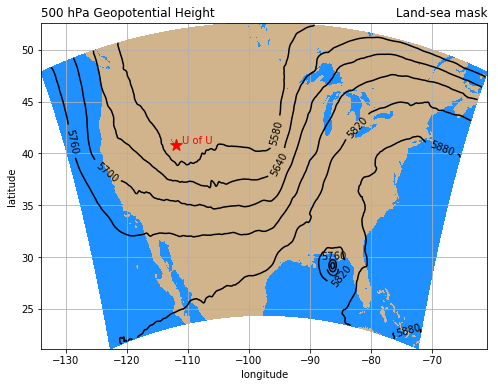

In [29]:
# To georeference the image, you can set the x and y values of the plot as the latitude and longitude from the data file.
# Overlay the geopotential hieght on the Land-Water data.

plt.figure(figsize=[8,6])

# Plot land/water boundaries
plt.contourf(LAND['lon'], LAND['lat'], LAND['value'], levels=[0,.5,1], colors=['dodgerblue','tan'])
plt.title(LAND['name'], loc='right')

# Plot 500 hPa geopotential height
cs = plt.contour(HGT500['lon'], HGT500['lat'], HGT500['value'], colors='k', levels=range(5400,6000,60))
plt.clabel(cs, fmt='%0.0f')

#put a star at Salt Lake City and label as "U of U"
plt.scatter(-111.9, 40.8, marker='*', c='r', s=150)
plt.text(-110.9, 41.0, 'U of U', color='r')

plt.title('500 hPa ' + HGT500['name'], loc='left')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.grid()

<br>
<br><br>
<br>

# The below stuff is just for reference and bonus learning exercises.

Practice makes perfect.

---

## GOES-16 Wavelengths
How to generate the wavelengths plot used earlier in these notes.

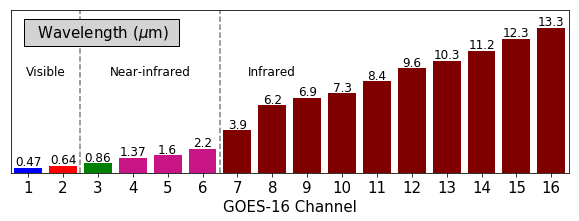

In [30]:
# Wavelengths
W = [0.47, 0.64, 0.86, 1.37, 1.6, 2.2, 3.9, 6.2, 6.9, 7.3, 8.4, 9.6, 10.3, 11.2, 12.3, 13.3]

# Channels
C = range(1,17)

# Representative colors
colors = ['b', 'r', 'g', 'mediumvioletred', 'mediumvioletred', 'mediumvioletred', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon']

plt.figure(figsize=[10,3])

plt.bar(C, W, color=colors)
for i, w in enumerate(W):
    plt.text(i+1, w+.25, w, horizontalalignment='center', fontsize=12)
plt.xticks(C, fontsize=15);
plt.xlabel('GOES-16 Channel', fontsize=15)
plt.yticks([]);
plt.xlim([.5,16.5])
plt.ylim([0,15]);


t = plt.text(1, 12.5, r'  Wavelength ($\mu$m)  ', fontsize=15);
t.set_bbox(dict(facecolor='lightgrey'))

plt.axvline(2.5, linestyle='--', color='grey')
plt.axvline(6.5, linestyle='--', color='grey')
plt.text(1.5, 9, r'Visible', fontsize=12, horizontalalignment='center');
plt.text(4.5, 9, r'Near-infrared', fontsize=12, horizontalalignment='center');
plt.text(8, 9, r'Infrared', fontsize=12, horizontalalignment='center');

plt.savefig('./images/GOES-wavelengths.png', dpi=100, bbox_inches='tight')

## Advanced GOES-16 RGB Composites

Can you follow the RGB recipe to create the day convection RGB product?

http://rammb.cira.colostate.edu/training/visit/quick_guides/QuickGuide_GOESR_DayConvectionRGB_final.pdf

Look at the [ABI bands quick guides](https://www.goes-r.gov/education/ABI-bands-quick-info.html) to see which channel corresponds to each wavelength in the recipe.

Notice that the units of these channels are in Kelvin (the difference between two Kelvin values is the same as Celsius), but _RGB values must be between 0 and 1_. To fix this, we normalize the channel differences by the max/min range as instructed in the recipe (https://stats.stackexchange.com/a/70807/220885)
    
    normalized_value = (value-minimum)/(maximum-minimum)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


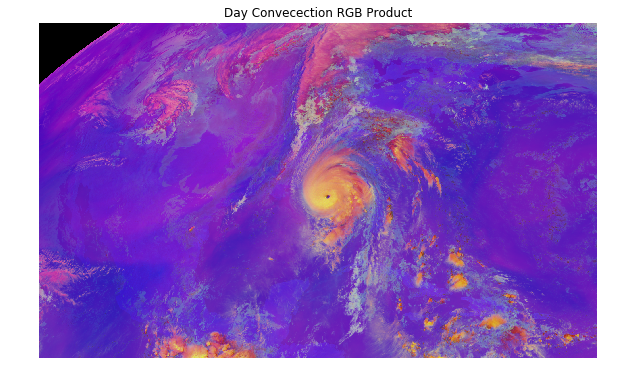

In [31]:
# Load the channel we need
C08 = np.load('./data/GOES_ABI_20181010-1438_C08.npy').item()
C10 = np.load('./data/GOES_ABI_20181010-1438_C10.npy').item()
C07 = np.load('./data/GOES_ABI_20181010-1438_C07.npy').item()
C13 = np.load('./data/GOES_ABI_20181010-1438_C13.npy').item()
C05 = np.load('./data/GOES_ABI_20181010-1438_C05.npy').item()
C02 = np.load('./data/GOES_ABI_20181010-1438_C02.npy').item()

R_c = C08['data']-C10['data']
G_c = C07['data']-C13['data']
B_c = C05['data']-C02['data']

# Normalize values of each channel. RGB values must be between 0 and 1, scalled according to the recipe.
# Normalize values between 0 and 1: normalized_value = (value-minimum)/(maximum-minimum)
# https://stats.stackexchange.com/a/70807/220885
R_c = (R_c-(-35))/(5-(-35))
G_c = (G_c-(-5))/(60-(-5))
B_c = (B_c-(-.75))/(.25-(-.75))

RGB_convective = np.dstack([R_c, G_c, B_c])

plt.figure(figsize=[10,7])
plt.imshow(RGB_convective)
plt.title('Day Convecection RGB Product');
plt.axis('off');

## GOES-16 and HRRR overlay
You need to specify the x and y coordinates for every grid point with the dictionary keys 'lat' and 'lon'. We can't use imshow to make RGB imagaes. (It takes a lot of extra work to make RGBs with pcolormesh that I won't show, but it is decribed [here](https://github.com/blaylockbk/pyBKB_v3/blob/master/BB_GOES/mapping_GOES16_TrueColor.ipynb)), but you can use pcolormesh and plot single channels at a time.

In [32]:
# load GOES ABI geospatial data
latlon = np.load('./data/GOES_ABI_2km_latlon.npy').item()

# Load GOES Channel 2 (red band)
channel_02 = np.load('./data/GOES_ABI_20181010-1438_C02.npy').item()

# Load HRRR Wind Gusts
gusts = np.load('./data/HRRR_F00_20181010-1400_GUST-surface.npy').item()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


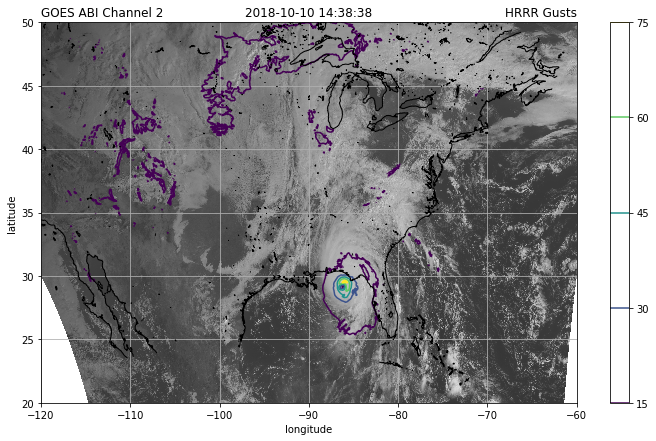

In [33]:
plt.figure(figsize=[12,7])

# Plot the red band (remember to apply gamma correction)
plt.pcolormesh(latlon['lon'], latlon['lat'], channel_02['data']**.4, cmap='gray')
plt.title("GOES ABI Channel 2", loc='left')

# Plot the HRRR gusts as contours
plt.contour(gusts['lon'], gusts['lat'], gusts['value'])
plt.colorbar()
plt.title("HRRR Gusts", loc='right')

# Plot land-water edge boundary in black from the model
plt.contour(LAND['lon'], LAND['lat'], LAND['value'], levels=[0], colors='k', linewidths=1)

plt.title(channel_02['DATE'])

plt.xlim([-120, -60])
plt.ylim([20,50])
plt.grid()

plt.ylabel('latitude');
plt.xlabel('longitude');

### How the individual GOES16 files were created...
This will not work on the Library computers becuase `xarray` and `netcdf4` readers are not installed.

In [34]:
# import xarray
# from datetime import datetime

In [35]:
# ABI = xarray.open_dataset('./data/OR_ABI-L2-MCMIPC-M3_G16_s20182831437203_e20182831439576_c20182831440087.nc')

In [36]:
'''
for channel in range(1,17):
    
    DATE = str(ABI['t'].data)[:-10]
    DATE = datetime.strptime(DATE, '%Y-%m-%dT%H:%M:%S')

    save_this = {'wavelength': ABI['band_wavelength_C%02d' % channel].data[0],
                 'data': ABI['CMI_C%02d' % channel].data[:],
                 'units': ABI['CMI_C%02d' % channel].units,
                 'long name': ABI['CMI_C%02d' % channel].long_name,
                 'standard name': ABI['CMI_C%02d' % channel].standard_name,
                 'DATE': str(DATE)}
    
    np.save('./data/GOES_ABI_%s_C%02d.npy' % (DATE.strftime('%Y%m%d-%H%M'), channel), save_this)
plt.ylable('latitude')
'''

"\nfor channel in range(1,17):\n    \n    DATE = str(ABI['t'].data)[:-10]\n    DATE = datetime.strptime(DATE, '%Y-%m-%dT%H:%M:%S')\n\n    save_this = {'wavelength': ABI['band_wavelength_C%02d' % channel].data[0],\n                 'data': ABI['CMI_C%02d' % channel].data[:],\n                 'units': ABI['CMI_C%02d' % channel].units,\n                 'long name': ABI['CMI_C%02d' % channel].long_name,\n                 'standard name': ABI['CMI_C%02d' % channel].standard_name,\n                 'DATE': str(DATE)}\n    \n    np.save('./data/GOES_ABI_%s_C%02d.npy' % (DATE.strftime('%Y%m%d-%H%M'), channel), save_this)\nplt.ylable('latitude')\n"